<h1>Sign Language Detection</h1>
<h2>What is the sign language?</h2>
<p>Sing language is a visual-gestural language used by deaf and hard-to-hearing individuals to convey imformation, thoughts and emotions.</p>

<p>Sign language recognition is the process of using typically computer vision and machine learning, to interpret and understand sign language gestures made by individuals.</p>

<div class="alert alert-success">
    <h2>Table of content</h2>
    <ol>
        <li><a href="#project_goal">Project Goal</a></li>
        <li>
            <a href="#business_understanding">Business Understanding</a>
            <ol>
                <li><a href="#purpose">Purpose</a></li>
                <li><a href="#business_impact">Business Impact</a></li>
                <li><a href="#stakeholders">Stakeholders</a></li>
            </ol>
        </li>
        <li>
            <a href="#technologies_and_tools">Technologies and tool</a>
        </li>
        <li>
            <a href="#load_dataset">Load Dataset</a>
        </li>
        <li>
            <a href="#prepare_train_test_sets">Prepare Train/Test sets</a>
        </li>
        <li>
            <a href="#implement_forward_prop">Implement Forward Propagation</a>
        </li>
        <li>
            <a href="#summary_of_the_model">Summary of the model</a>
        </li>
        <li>
            <a href="#train_the_model">Train the model</a>
        </li>
        <li>
            <a href="#history_object">History object</a>
        </li>        
        <li>
            <a href="#loss_and_accuracy">Loss and Accuracy of the model</a>
        </li>
        <li>
            <a href="#save_the_model">Saving the model for tuture use</a>
        </li>
    </ol>
</div>

<a id="project_goal"></a>
<h2>Project Goal</h2>
<p>In this project I will be developing a model to detect sign language digits 0 to 5.</p>

<a id="business_understanding"></a>
<h2>Business Understanding</h2>
<a id="purpose"></a>
<h3>Purpose</h3>
To promote inclusivity, accessibility, and effective communication for the deaf and hard-of-hearing communities.

<a id="business_impact"></a>
<h3>Business Impact</h3>
<p>Project like this can opens up various opportunities and benifits for both commercial and non-profit organizations.</p>
<ul>
    <li>Market Opportunities
    <li>Revenue Generation
    <li>Improved customer service
    <li>Innovation and Research opportunities
    <li>Job creation
</ul>

<a id="stakeholders"></a>
<h3>Stakeholders</h3>
<ul>
    <li>Deaf and hard-hearing communities
    <li>Research nad developers
    <li>Government and Regulatory bodies.
    <li>Education and Schools
    <li>Healthcare Providers
</ul>

<a id="datasource"></a>
<h2>Data source</h2>
This project is based on SIGNS dataset. This SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5

<a id="technologies_and_tools"></a>
<h2>Technologies and tools</h2>
<ol>
    <li>Tensorflow
    <li>Keras' Functional API
</ol>

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline

<a id="load_dataset"></a>
<h2>Load dataset</h2>

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


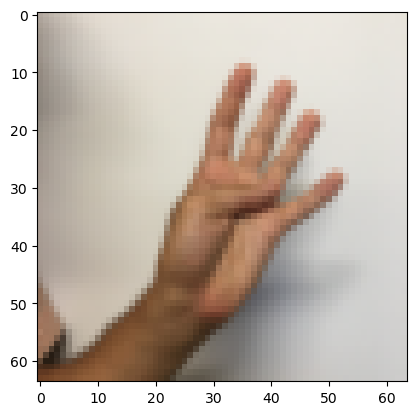

In [3]:
# Example image from the dataset
index = 5
plt.imshow(X_train_orig[index])
print("y = %s" % (str(np.squeeze(Y_train_orig[:, index]))))

<a id="prepare_train_test_sets"></a>
<h2>Prepare Train/Test sets and examin the dataset its size and shape</h2>


In [4]:
X_train = X_train_orig/255
X_test = X_test_orig/255
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print("Number of training examples : %s" % (str(X_train.shape[0])))
print("Number of test samples : %s" % (str(X_test.shape[0])))
print("X_train shape : %s" % (str(X_train.shape)))
print("Y train shape : %s" % (str(Y_train.shape)))
print("X_test shape : %s" % (str(X_test.shape)))
print("Y_test shape : %s" % (str(Y_test.shape)))

Number of training examples : 1080
Number of test samples : 120
X_train shape : (1080, 64, 64, 3)
Y train shape : (1080, 6)
X_test shape : (120, 64, 64, 3)
Y_test shape : (120, 6)


<a id="implement_forward_prop"></a>
<h2>Implement Forward Propagation using convolutoinal model</h2>
I will be using following structure for this model

`CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE`

In [5]:
def convolutional_model(input_shape):
    """
    Implement the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)
    
    Returns -- Tensorflow Keras model
    """
    
    input_img = tf.keras.Input(shape=input_shape)
    
    Z1 = tfl.Conv2D(filters=8, kernel_size=4, strides=1, padding='same')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=8, strides=8, padding='same')(A1)
    
    Z2 = tfl.Conv2D(filters=16, kernel_size=2, strides=1, padding='same')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=4, strides=4, padding='same')(A2)
    #D2 = tfl.Dropout(0.1)(P2)
    # Z3 = tfl.Conv2D(filters=32, kernel_size=2, strides=1, padding='same')(P2)
    # A3 = tfl.ReLU()(Z3)
    # P3 = tfl.MaxPool2D(pool_size=2, strides=2, padding='same')(A3)
    
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(units=6, activation='softmax')(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    
    return model

## Create the model and compile it

In [6]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
conv_model = convolutional_model(input_shape)
conv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<a id="summary_of_the_model"></a>
<h2>Summary of the model</h2>

In [7]:
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         392       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 8)           0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 16)          0         
                                                             

<a id="train_the_model"></a>
<h2>Train the model</h2>
Here I choose mini-bathces of 64 training examples.

In [8]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=30, validation_data=test_dataset, verbose=1)

Epoch 1/30
17/17 [==============================] - 1s 33ms/step - loss: 1.8102 - accuracy: 0.1676 - val_loss: 1.7953 - val_accuracy: 0.1667
Epoch 2/30
17/17 [==============================] - 0s 25ms/step - loss: 1.7907 - accuracy: 0.2120 - val_loss: 1.7867 - val_accuracy: 0.2250
Epoch 3/30
17/17 [==============================] - 0s 27ms/step - loss: 1.7844 - accuracy: 0.2231 - val_loss: 1.7833 - val_accuracy: 0.2000
Epoch 4/30
17/17 [==============================] - 0s 28ms/step - loss: 1.7801 - accuracy: 0.2602 - val_loss: 1.7800 - val_accuracy: 0.2583
Epoch 5/30
17/17 [==============================] - 0s 28ms/step - loss: 1.7756 - accuracy: 0.3074 - val_loss: 1.7762 - val_accuracy: 0.3000
Epoch 6/30
17/17 [==============================] - 1s 30ms/step - loss: 1.7702 - accuracy: 0.3250 - val_loss: 1.7712 - val_accuracy: 0.3417
Epoch 7/30
17/17 [==============================] - 1s 30ms/step - loss: 1.7607 - accuracy: 0.3213 - val_loss: 1.7613 - val_accuracy: 0.3167
Epoch 8/30
17

<a id="history_object"></a>
<h2>History object</h2>
The History object is an output of the `.fit()` operation, and provides a record of all the loss and metric values in memory. It's stored as a dictionary that we can retrieve by calling `history.history`

In [103]:
# call history object
#history.history

Now we can visualize loss over time using `history.history`

The `history.history["loss"]` entry is a dictionary with as many as many values as epochs that the model was trained.

In [9]:
df_loss_acc = pd.DataFrame(history.history)
df_loss_acc

,loss,accuracy,val_loss,val_accuracy
0,1.810197,0.167593,1.795258,0.166667
1,1.790725,0.212037,1.786749,0.225000
2,1.784438,0.223148,1.783255,0.200000
3,1.780055,0.260185,1.780004,0.258333
4,1.775599,0.307407,1.776237,0.300000
5,1.770219,0.325000,1.771183,0.341667
6,1.760660,0.321296,1.761293,0.316667
7,1.748050,0.330556,1.749184,0.308333
8,1.731107,0.358333,1.734735,0.316667
9,1.709038,0.362963,1.715425,0.358333


In [10]:
df_loss = df_loss_acc.loc[:, ['loss', 'val_loss']]
df_loss.rename(columns={'loss': 'train', 'val_loss': 'validation'}, inplace=True)
df_loss

,train,validation
0,1.810197,1.795258
1,1.790725,1.786749
2,1.784438,1.783255
3,1.780055,1.780004
4,1.775599,1.776237
5,1.770219,1.771183
6,1.760660,1.761293
7,1.748050,1.749184
8,1.731107,1.734735
9,1.709038,1.715425


In [11]:
df_acc = df_loss_acc.loc[:, ['accuracy', 'val_accuracy']]
df_acc.rename(columns={'accuracy': 'train', 'val_accuracy': 'validation'}, inplace=True)
df_acc

,train,validation
0,0.167593,0.166667
1,0.212037,0.225000
2,0.223148,0.200000
3,0.260185,0.258333
4,0.307407,0.300000
5,0.325000,0.341667
6,0.321296,0.316667
7,0.330556,0.308333
8,0.358333,0.316667
9,0.362963,0.358333


<a id="loss_and_accuracy"></a>
<h2>Loss and Accuracy of the model</h2>

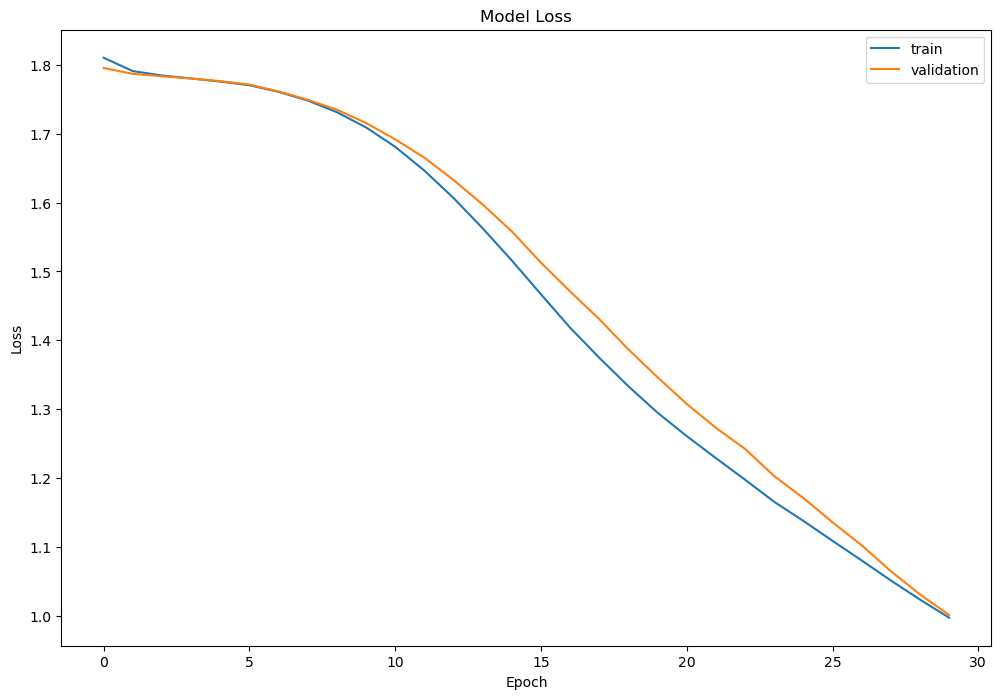

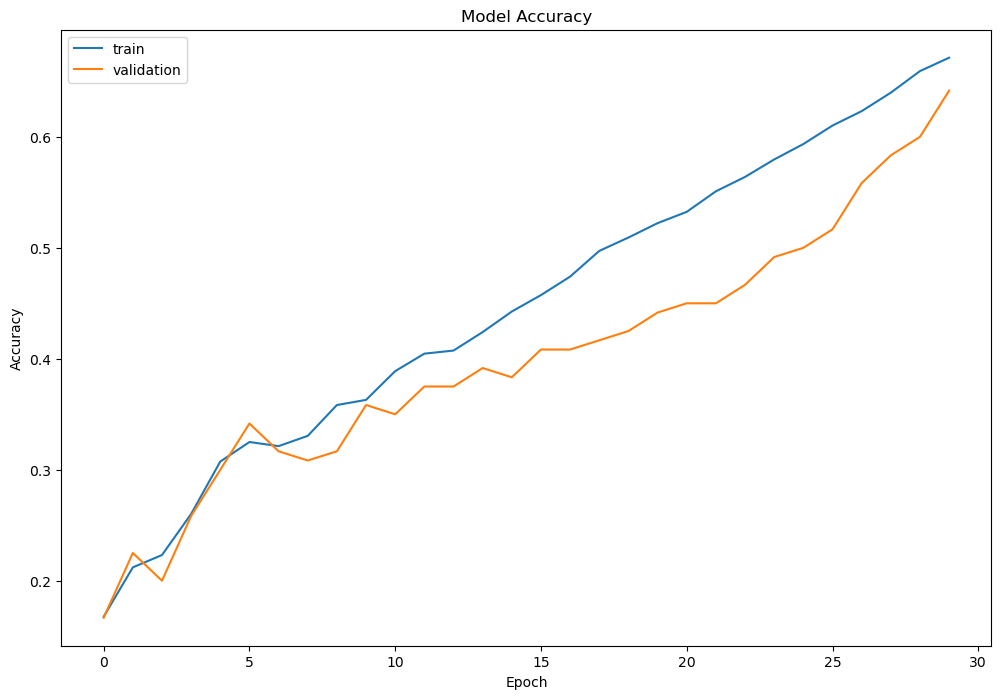

In [12]:
df_loss.plot(title="Model Loss", figsize=(12, 8)).set(xlabel="Epoch", ylabel="Loss")
df_acc.plot(title="Model Accuracy", figsize=(12, 8)).set(xlabel="Epoch", ylabel="Accuracy")
plt.show()

<a id="save_the_model"></a>
<h2>Saving the model for future use</h2>

In [17]:
conv_model.save('sign_laguange.keras')

In [18]:
def imageToArray(imageName):
    # Load the image and resize it to the desired dimensions
    #image_path = f'images/{imageName}'
    image_path = f'images/{imageName}'
    width, height = 64, 64

    image = Image.open(image_path)
    image = image.resize((width, height))
    #print(image.width)
    # Convert the image to a NumPy array and normalize the pixel values (if necessary)
    image_array = np.asarray(image)
    image_array = image_array / 255.  # Normalize the pixel values between 0 and 1
    
    plt.imshow(image_array)
    plt.show()

    print(image_array.shape)
    # Reshape the image array to match the input shape of your model
    image_array = image_array.reshape(1, width, height, 3)  # Assumes the input shape is (width, height, 3)

    return image_array

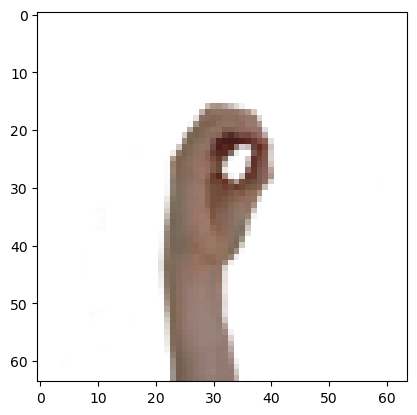

(64, 64, 3)
1/1 [==============================] - 0s 87ms/step
0


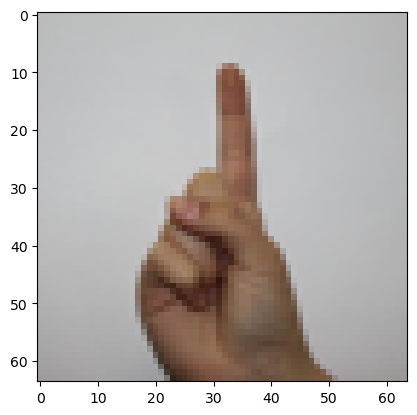

(64, 64, 3)
1/1 [==============================] - 0s 17ms/step
1


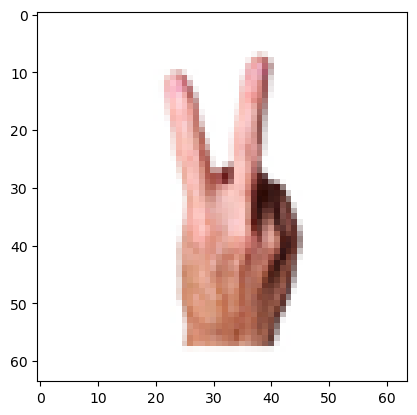

(64, 64, 3)
1/1 [==============================] - 0s 16ms/step
0


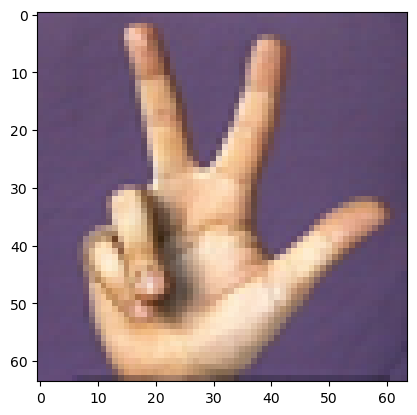

(64, 64, 3)
1/1 [==============================] - 0s 17ms/step
3


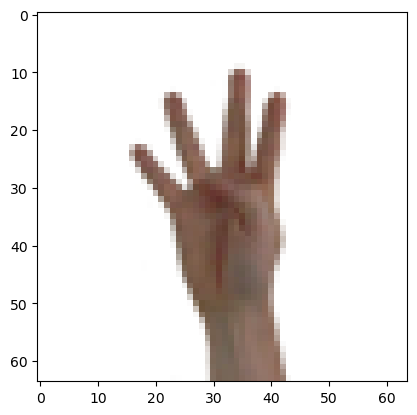

(64, 64, 3)
1/1 [==============================] - 0s 16ms/step
5


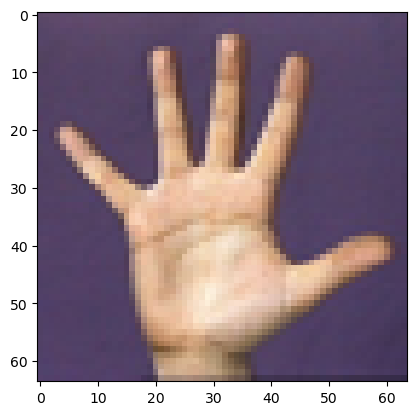

(64, 64, 3)
1/1 [==============================] - 0s 17ms/step
3


In [19]:
test_images = ['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']
for img in test_images:
    img_array = imageToArray(img)
    predicted = conv_model.predict(img_array)
    print(np.argmax(predicted))